In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
%matplotlib inline

In [4]:
df = pd.read_csv('wages.csv')

In [5]:
df

,earn,height,sex,race,ed,age
0,79571.299011,73.89,male,white,16,49
1,96396.988643,66.23,female,white,16,62
2,48710.666947,63.77,female,white,16,33
3,80478.096153,63.22,female,other,16,95
4,82089.345498,63.08,female,white,17,43
...,...,...,...,...,...,...
1374,30173.380363,71.68,male,white,12,33
1375,24853.519514,61.31,female,white,18,86
1376,13710.671312,63.64,female,white,12,37
1377,95426.014410,71.65,male,white,12,54


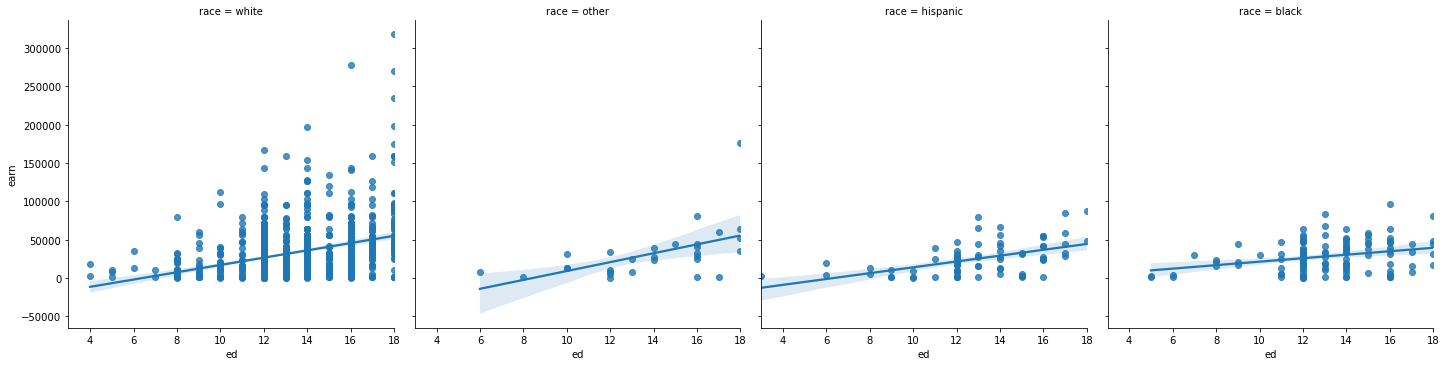

In [6]:
sex = pd.get_dummies(df['sex'],drop_first=True)
race = pd.get_dummies(df['race'])
sns.lmplot(x='ed',y='earn',data=df,col='race')

In [7]:
df = pd.concat([df,race,sex],axis = 1)

In [8]:
X = df.drop(['sex','race','earn'],axis=1)
y = df['earn']

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

In [10]:
lm = LinearRegression()

In [11]:
lm.fit(X_train,y_train)

LinearRegression()

In [12]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
height,283.765576
ed,4376.471760
age,282.822133
black,1537.827247
hispanic,-2832.611054
other,-3506.095041
white,4800.878847
male,20844.108893


In [13]:
predictions = lm.predict(X_test)
y_test-predictions

646     122148.081701
1310     -9972.113222
964        841.818606
551      12299.657551
138      53312.746763
            ...      
804       7519.957834
121      20482.531912
1125    -10560.084342
333       1146.153042
720      13804.855857
Name: earn, Length: 414, dtype: float64

<AxesSubplot:xlabel='earn'>

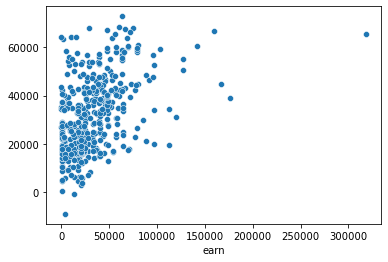

In [14]:
sns.scatterplot(x=y_test,y=predictions)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


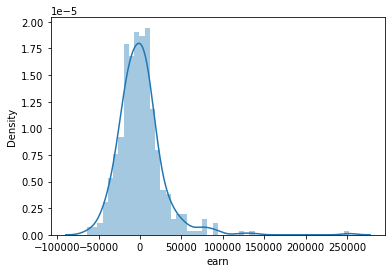

In [15]:
sns.distplot((y_test-predictions),bins=50);

<AxesSubplot:xlabel='sex', ylabel='earn'>

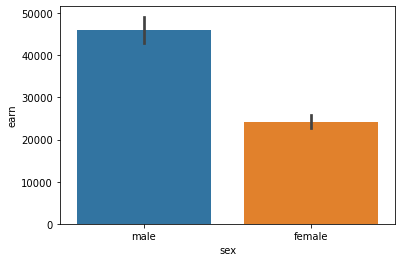

In [16]:
sns.barplot(x='sex',y='earn',data=df)

<AxesSubplot:xlabel='race', ylabel='earn'>

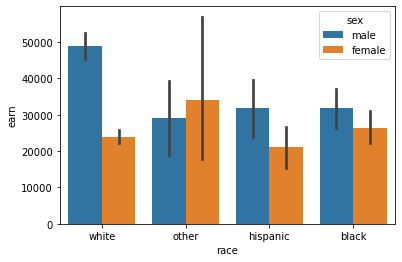

In [17]:
sns.barplot(x='race',y='earn',data=df,hue = 'sex')

In [18]:
df.mean()

earn        32446.292622
height         66.592640
ed             13.354605
age            45.328499
black           0.091371
hispanic        0.055838
other           0.021030
white           0.831762
male            0.377085
dtype: float64

In [19]:
df[df['sex'] == 'male']['earn'].mean() - df[df['sex'] == 'female']['earn'].mean()

21747.479044839427

In [27]:
(y_test-predictions).mean()

628.8859530168627